<a href="https://colab.research.google.com/github/huang624/GoogleNewsAPI/blob/main/GoolgeNews_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GoogleNews udicOpenData wordcloud
from udicOpenData.stopwords import *
!wget https://www.zhfont.com/chinese/font/POP.ttf -O POP.ttf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-07-03 10:39:42--  https://www.zhfont.com/chinese/font/Doll.ttf
Resolving www.zhfont.com (www.zhfont.com)... 172.67.141.124, 104.21.89.115, 2606:4700:3034::ac43:8d7c, ...
Connecting to www.zhfont.com (www.zhfont.com)|172.67.141.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4110488 (3.9M) [application/octet-stream]
Saving to: ‘Doll.ttf’

Doll.ttf            100%[===================>]   3.92M  2.54MB/s    in 1.5s    

2022-07-03 10:39:43 (2.54 MB/s) - ‘Doll.ttf’ saved [4110488/4110488]



In [ ]:
from GoogleNews import GoogleNews
GoogleNews().clear()

In [48]:
googlenews = GoogleNews(lang='zh-TW', encode='utf-8')
googlenews.search('防疫')

### 第一頁到第十頁的新聞 標題與描述

In [49]:
from collections import Counter

title_and_description = []
for page in range(1,11):  
  result_list = googlenews.page_at(page)
  for result in result_list:
    title_and_description += list(rmsw(result['desc'])) + list(rmsw(result['title']))

frequency_counting_table = dict(Counter(title_and_description))
frequency_counting_table

{'這是': 3,
 '選前': 2,
 '大撒幣': 2,
 '嘉義縣': 6,
 '有近': 1,
 '四分之一': 1,
 '鄉鎮': 2,
 '市長': 8,
 '決定': 2,
 '發放': 10,
 '防疫': 165,
 '補助金': 4,
 '包括': 6,
 '朴子市': 1,
 '太保市': 1,
 '竹崎鄉': 4,
 '義竹鄉': 7,
 '發': 3,
 '兩千元': 1,
 '外': 1,
 '一千元': 1,
 '普發': 1,
 '金': 2,
 '青島機場': 2,
 '集團': 1,
 '通報': 2,
 '外籍': 3,
 '旅客': 4,
 '配合': 7,
 '疫情': 51,
 '防控': 3,
 '言語': 1,
 '粗暴': 1,
 '取消': 10,
 '航班': 3,
 '行程': 5,
 '工作': 3,
 '情況': 2,
 '說明': 1,
 '時許': 1,
 '四川航空': 1,
 '執飛': 1,
 '財經新聞': 1,
 '台北': 11,
 '市政府': 3,
 '去年': 1,
 '發起': 1,
 '武漢': 2,
 '肺炎': 11,
 '新型': 1,
 '冠狀病毒': 1,
 '病': 1,
 'COVID': 11,
 '民間': 1,
 '募款': 1,
 '市議員': 1,
 '游淑慧': 2,
 '指出': 4,
 '北': 6,
 '市府': 7,
 '累計': 9,
 '入帳': 1,
 '億': 3,
 '民眾': 9,
 '愛心': 2,
 '不到': 1,
 '一年': 2,
 '已用': 1,
 '罄': 1,
 '導致': 2,
 '近期': 6,
 '轟北': 1,
 '亂花': 1,
 '捐款': 1,
 '亡者': 1,
 '家屬': 1,
 '無': 3,
 '慰問金': 1,
 '死': 1,
 '太晚': 1,
 '生活': 9,
 '無任所大使': 2,
 '林佳龍': 4,
 '積極爭取': 1,
 '民進黨': 3,
 '提名': 1,
 '日前': 5,
 '仇恨': 2,
 '值': 2,
 '說': 2,
 '指': 5,
 '影射': 1,
 '衛福': 2,
 '部長': 2,
 '陳時中': 6,
 '對此': 4,
 '衛福部': 5,

In [50]:
sorted(frequency_counting_table.items(), key=lambda x:x[1], reverse = 1)[0:10]

[('防疫', 165),
 ('疫情', 51),
 ('確診', 30),
 ('保單', 26),
 ('台灣', 23),
 ('新冠', 22),
 ('險', 21),
 ('表示', 20),
 ('產險', 20),
 ('本土', 19)]

### 標題與描述 文字雲呈現

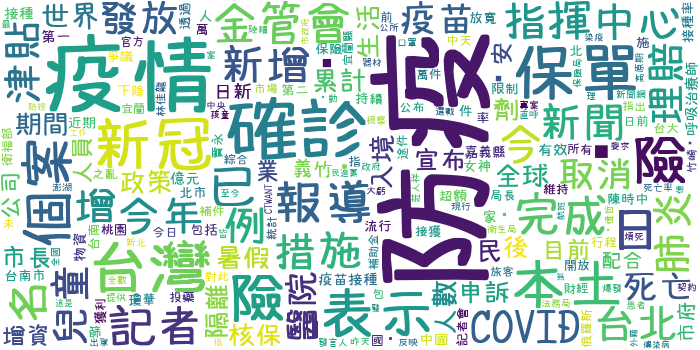

In [51]:
from wordcloud import WordCloud
from IPython.display import Image, display
cloud = WordCloud(background_color="white", font_path="/content/POP.ttf", width=700, height = 350).generate_from_frequencies(frequency_counting_table)
cloud.to_file('output.png')
display(Image('/content/output.png'))